<a href="https://colab.research.google.com/github/SwathiAunooru/DataScience/blob/master/HandWritten_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [0]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

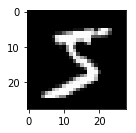

In [12]:
plt.subplot(221)
plt.imshow(x_train[0],cmap=plt.get_cmap('gray'))

In [19]:
x_train.shape

(60000, 28, 28)

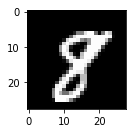

In [38]:
plt.subplot(221)
plt.imshow(x_train[55],cmap=plt.get_cmap('gray'))

In [23]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data",one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [0]:
n_nodes_hl1 = 500 #num of nodes in hid layer 1
n_nodes_hl2 = 500 #num of nodes in hid layer 2
n_nodes_hl3 = 500 #num of nodes in hid layer 3

n_classes = 10 # as v hv 10 digits 0 to 9
batch_size = 100


In [0]:
x = tf.placeholder('float',[None,784])
y = tf.placeholder('float',[None,n_classes])

In [31]:
test = tf.random_normal([784,500])
print(test)

Tensor("random_normal_1:0", shape=(784, 500), dtype=float32)


In [0]:
def neuralnetworkmodel(data):
  
  hidden_1_layer = {'weights':tf.Variable(tf.random_normal([784,n_nodes_hl1])),
                    'biases':tf.Variable(tf.random_normal([n_nodes_hl1]))}
    # 784 rnd norml distr nmbrs with a size of n_nds_hl1
  hidden_2_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl1,n_nodes_hl2])),
                    'biases':tf.Variable(tf.random_normal([n_nodes_hl2]))}
    # the ip for layer2 is the op of lyr1
    # so n_nodes_hl1 bcms the ip 
    # nd n_nodes_hl2 bcms the op of ly2
  hidden_3_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl2,n_nodes_hl3])),
                    'biases':tf.Variable(tf.random_normal([n_nodes_hl3]))}
  output_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl3,n_classes])), #n_clss is a vec of 10 neurons with 10 dfrnt
                   # vals which r then cmprd with encded vals of real nums in the pic
                    'biases':tf.Variable(tf.random_normal([n_classes]))}
    # layer1
  l1 = tf.add(tf.matmul(data,hidden_1_layer['weights']),hidden_1_layer['biases'])
    # v r multiplying data with hdn layer 1 with the wts nd then add the bias
    
    #nxt v need to add the activ func 
    # nd the best one os relu
  l1 = tf.nn.relu(l1) #this will put the op of act func in l1
  l2 = tf.add(tf.matmul(l1,hidden_2_layer['weights']),hidden_2_layer['biases'])
  l2 = tf.nn.relu(l2) #this will put the op of act func in l
  l3 = tf.add(tf.matmul(l2,hidden_3_layer['weights']),hidden_3_layer['biases'])
  l3 = tf.nn.relu(l3) #this will put the op of act func in l
  output = tf.matmul(l3,output_layer['weights']) + output_layer['biases']
    #output = tf.nn.relu(l3) #this will put the op of act func in l
  return output

In [0]:
def trainneuralnetwork(x):
    prediction = neuralnetworkmodel(x)
    # next v need to cmpr our prediction with encoded val
    # to do this v use the cost func
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction,labels=y)) 
    # softmax_cross_entropy_with_logits refers to logstc regr
    # this is used for reducing the cost
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    # this is the stochastic grad desc
    epochs = 3
    # v hv 60k training imgs 
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer()) # this will initialize the placeholder global vars v created on the top
        
        for ep in range(epochs):
            epoch_loss = 0 
            for _ in range(int(mnist.train.num_examples/batch_size)): #same as 60k/100
                epoch_x,epoch_y = mnist.train.next_batch(batch_size) # for ea ep for ea btch size
                # say v r creating 100 images of our training data
                _,c = sess.run([optimizer,cost],feed_dict={x:epoch_x, y:epoch_y})
                epoch_loss+=c # this will calc the tot loss for 1 epoch aftr going thru all the 600 btchs
                # of a 100 pics
                print('Epoch:', ep, ' completed out of ', epochs, ' loss', epoch_loss)
            correct = tf.equal(tf.argmax(prediction,1), tf.argmax(y,1))
            # the op v get is a vec
            accuracy = tf.reduce_mean(tf.cast(correct,'float'))
            print('Accuracy: ', accuracy.eval({x:mnist.test.images,y:mnist.test.labels})) # here is where the 10k imgs r taken


In [0]:
trainneuralnetwork(x)
